<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/2nd/15_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN

##컨볼루션(Convolution) 개념

$$ f(t)*g(t)= \int\limits_{-\infty}^{+\infty}f(\tau)g(t-\tau)d\tau$$

시간의 변화에 따른 연산

$$ f(t)*g(t)= \int\limits_{-\infty}^{+\infty}f(t)g(x-t)dx$$

1. 타우 대신에 x
2. 시간 t만큼 전이
3. 곱셈(f*g)
4. 덧셈(integral)

####해석1
* 시간의 흐름에 따라 데이터 g(x)가 이동하면서, 입력 데이터 f(x)를 평균적으로 얼마나 변화 시키는지 나타내는 것을 컨볼루션(Convolution)으로 정의 할 수 있음

####해석2
* 시간의 흐름에 따라 움직이는 데이터 g(x)에 의해서 입력데이터 f(x)가 평균적으로 얼마나 변하는지 나타내는 것을 컨볼루션(Convolution)으로 정의 할 수 있음

#CNN 아키텍처, 특징맵, 풀링, 패딩

##CNN의 아키텍처
* 은닉층이 하는 일을 CNN에서는 컨볼루션층에서 실행하게 된다

* conv(컨불루션,convolution)
  * 컨볼루션 연산을 통해 입력데이터 A1의 특징을 추출

* ReLU
  * ReLU함수 이용 0이하는 제거

* pooling(풀링)
  * 입력 정보를 최대값, 최소값, 평균값 등으로 압축하여 데이터 연산량을 줄여주는 역활 수행 

  ex) 4개의 값중 가장 큰값만 보내는 행동

* padding(패딩)
  * 입력 데이터 주변을 특정 값 (예를 들어 0) 으로 채우는 것
  * 입력 데이터가 컨볼루션 연산을 하면 할 수록 줄어드는 단점을 방지하기 위해 실행
  
  ex) 4*4에 외곽에 0을 채워서 6*6을 하고 컨볼루션을 하면 4*4 가 나옴
  패딩을 하여 데이터가 작아지는 것을 막흠



##출력 데이터의 크기 계산

##입력 크기 (H,W), 필터 크기(FH,FW) , 패딩(P), 스트라이드(S) 일때 출력 데이터 크기 (OH,OW)

$$OH={H+2P-FH\over S} +1$$
$$OW={W+2P-FW\over S} +1$$

##CNN에서 사용하는 api

* conv
  conv2D(**input_shape=(높이,넓이,채널)와 kernel_size(,),filters=**,strides=(,),activation='',use_bias=True,padding='')
  첫레이어 제외 다음부터는 input_shape없이 가능

* pool
  MaxPool2D(pool_size=(,),padding=)
  pool_size=(2,2)dlaus 2*2행렬안에서 최대값만 남기는 연산을 수행

* Flat
  Flatten(높이,넓이,채널),3차원 텐서를 1차원 벡터로 만들어준다

* Dense
  그동안 사용한 레이어와 같다 완전 연결층을 나타냄
* Dropout
  Dropout(rate=0.2) 학습과정중에 rate에 지정된 비율만큼 층과 층 사이에 연결을 귾어서 네트워크에 과적함을 막는 역활을 수행함

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15565291055454608560
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14303386244014407740
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
mnist=tf.keras.datasets.mnist
(x_train,t_train),(x_test,t_test)=mnist.load_data()

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

print(x_train.shape)
print(x_test.shape)

x_train,x_test=x_train.astype(np.float32)/255.,x_test.astype(np.float32)/255.

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
cnn=Sequential()

cnn.add(Conv2D(input_shape=(28,28,1),kernel_size=(3,3),filters=32,activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3),filters=64,activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))



In [5]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

hist=cnn.fit(x_train,t_train,batch_size=128,epochs=30,validation_data=(x_test,t_test))

Epoch 1/30
469/469 [==============================] - 16s 10ms/step - loss: 0.2516 - accuracy: 0.9234 - val_loss: 0.0521 - val_accuracy: 0.9832
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0864 - accuracy: 0.9741 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0648 - accuracy: 0.9804 - val_loss: 0.0306 - val_accuracy: 0.9899
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0554 - accuracy: 0.9831 - val_loss: 0.0330 - val_accuracy: 0.9889
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0306 - val_accuracy: 0.9899
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0286 - val_accuracy: 0.9916
Epoc

In [6]:
cnn.evaluate(x_test,t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0275 - accuracy: 0.9932


[0.027538299560546875, 0.9932000041007996]

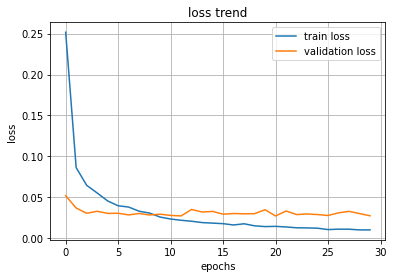

In [7]:
plt.title('loss trend')

plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')

plt.show()

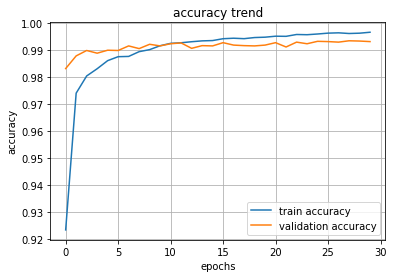

In [8]:
plt.title('accuracy trend')

plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [9]:
fmnist=tf.keras.datasets.fashion_mnist
(x_train,t_train),(x_test,t_test)=fmnist.load_data()

x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

print(x_train.shape)
print(x_test.shape)

x_train,x_test=x_train.astype(np.float32)/255.,x_test.astype(np.float32)/255.

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
hist=cnn.fit(x_train,t_train,batch_size=128,epochs=30,validation_data=(x_test,t_test))

Epoch 1/30
469/469 [==============================] - 4s 9ms/step - loss: 0.6109 - accuracy: 0.7988 - val_loss: 0.3630 - val_accuracy: 0.8663
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3843 - accuracy: 0.8605 - val_loss: 0.3200 - val_accuracy: 0.8861
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3411 - accuracy: 0.8749 - val_loss: 0.3050 - val_accuracy: 0.8919
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.3171 - accuracy: 0.8833 - val_loss: 0.2828 - val_accuracy: 0.8998
Epoch 5/30
469/469 [==============================] - 5s 12ms/step - loss: 0.3000 - accuracy: 0.8903 - val_loss: 0.2823 - val_accuracy: 0.8978
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.2802 - accuracy: 0.8973 - val_loss: 0.2671 - val_accuracy: 0.9031
Epoch 7/30
469/469 [==============================] - 5s 10ms/step - loss: 0.2667 - accuracy: 0.9017 - val_loss: 0.2568 - val_accuracy: 0.9098
Epoc

In [11]:
cnn.evaluate(x_test,t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2601 - accuracy: 0.9255


[0.2601381242275238, 0.9254999756813049]

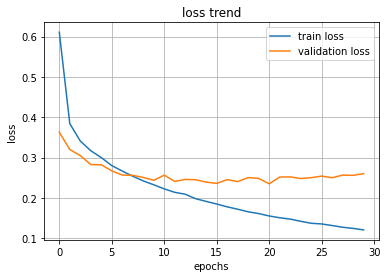

In [12]:
plt.title('loss trend')

plt.ylabel('loss')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='validation loss')

plt.legend(loc='best')

plt.show()

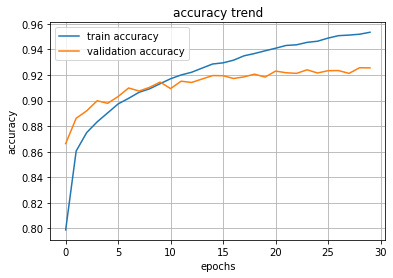

In [13]:
plt.title('accuracy trend')

plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.grid()

plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')

plt.legend(loc='best')

plt.show()